In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('results/timing-results.csv')
df[:8]

,algorithm,average time,total time,best time,worst time,number iterations,world file
0,Simple,11.337195,453.487785,11.176999,12.622265,40,star
1,Convolutional-(8x8),0.060625,2.425019,0.058996,0.065999,40,star
2,Convolutional-(16x16),0.018900,0.756001,0.017999,0.020001,40,star
3,Convolutional-(32x32),0.007850,0.313997,0.006996,0.010004,40,star
4,Convolutional-(64x64),0.004825,0.193000,0.003997,0.005014,40,star
5,Convolutional-(128x128),0.004150,0.165997,0.003000,0.006000,40,star
6,ExpandingWavefront,0.696580,27.863186,0.688998,0.719022,40,star
7,NaiveActiveArea,0.302614,12.104572,0.298999,0.320001,40,star


In [3]:
# star = df.loc[df['world file'] == 'large-field-medium-explored.tmj']
convolutional = df.loc[df['algorithm'] == 'Convolutional-(128x128)']
# sns.barplot(data=star, x='algorithm', y="average time")

convolutional

,algorithm,average time,total time,best time,worst time,number iterations,world file
5,Convolutional-(128x128),0.004150,0.165997,0.003000,0.006000,40,star
13,Convolutional-(128x128),0.003775,0.151000,0.002996,0.005012,40,large-field-large-explored
21,Convolutional-(128x128),0.003650,0.146000,0.002999,0.004002,40,large-field-medium-explored
29,Convolutional-(128x128),0.000925,0.037000,0.000000,0.001997,40,medium-field-large-explored
37,Convolutional-(128x128),0.001006,0.040252,0.000000,0.002012,40,medium-field-medium-explored


In [6]:
world_files = [('large-field-large-explored', 'Large (Majority)'), ('large-field-medium-explored', 'Large (Partial)'), ('star', 'Star'), ('medium-field-large-explored', 'Medium (Majority)'), ('medium-field-medium-explored', 'Medium (Partial)')]

all_32_dfs = pd.DataFrame()
for world_file, world_name in world_files:
    temp_df = pd.read_csv(f'results/timing/{world_file}-Convolutional-(8x8).csv')
    temp_df = temp_df.assign(world_file=world_name)
    all_32_dfs = pd.concat([all_32_dfs, temp_df])

all_32_dfs.rename(columns={'world_file': "Map", "time": "Time (s)"}, inplace=True)
all_32_dfs.head()

,Time (s),Map
0,0.060001,Large (Majority)
1,0.061000,Large (Majority)
2,0.060000,Large (Majority)
3,0.061000,Large (Majority)
4,0.061999,Large (Majority)


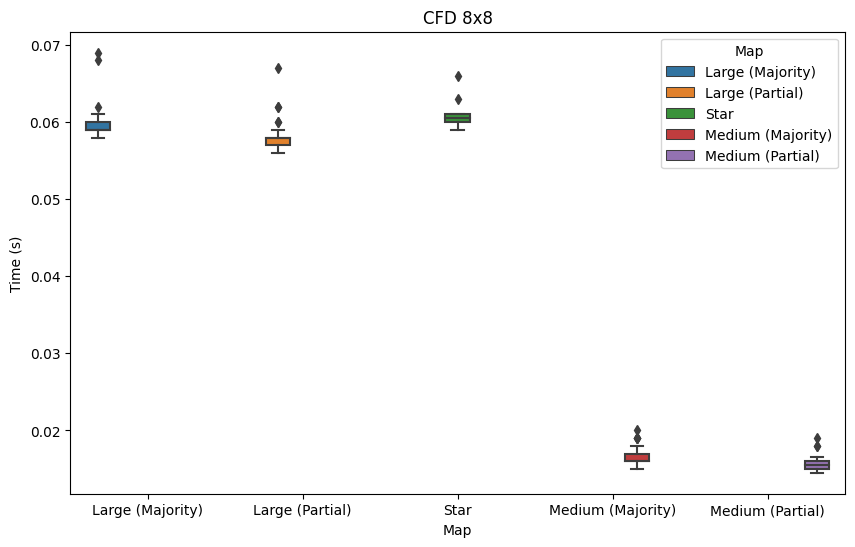

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Map", y="Time (s)", hue="Map", data=all_32_dfs).set(title="CFD 8x8")
plt.show()